# Mediation Analysis

In the context of causal effect estimation, we aim to evaluate the effect of a specific treatment $A$ on the outcome $Y$ of interest. However, there may exist other variables that can be influnced by treamtent, and affect the outcome at the same time. We denote these variables as the `Mediators`, denoted as $M$.

Let's borrow a classical example from [4] to illustrate the necessity of mediation analysis. Researchers would like to evaluate the direct effect of a birth-control pill on the incidence of thrombosis. However, it is also known that the pill has a negative indirect effect on thrombosis by reducing the probability of pregnancy. In this example, we would want to estimate the effect of birth-control pill on thrombosis in the sense that, independent of marital status and other potential mediators that may not be accounted for in the study, in order to obtain reliable and consistent results.



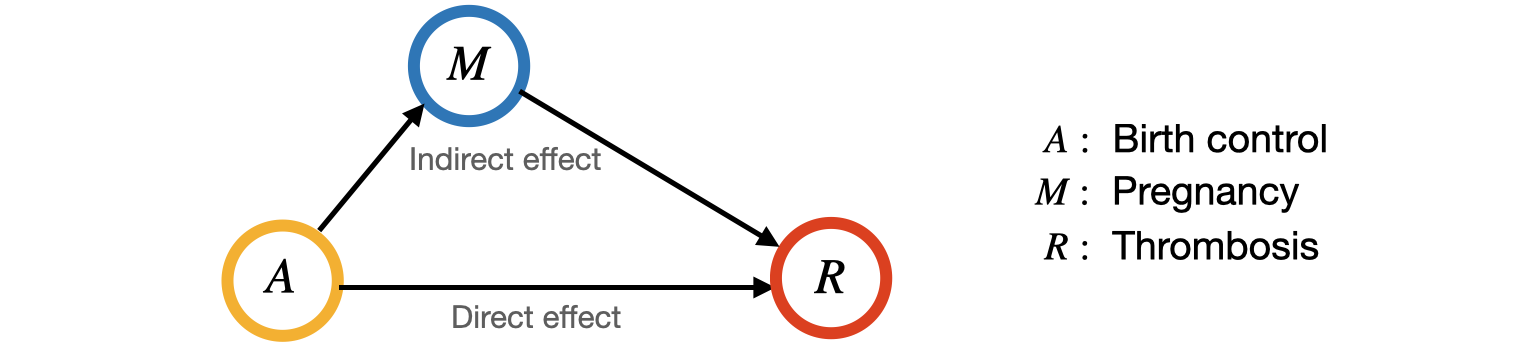

In [16]:
from IPython import display
display.Image("CEL-Mediation-IID.png")


## Definitions


In general mediation analysis, there are two potential paths that can cause the treatment effect on the outcome: 

1. The direct path from treament to outcome, denoted by $A\rightarrow R$;

2. The indirect path from treatment to outcome through the mediator $M$, denoted by $A\rightarrow M\rightarrow R$.

More specifically, when adjusting the action from $A=a_0$ to $A=a_1$,  we define the total effect (TE), natural direct effect (DE), and the natural indirect effect (DE) as below:

\begin{equation}
\begin{aligned}
\text{TE}&= \mathbb{E}[R|do(A=a_1)]-\mathbb{E}[R|do(A=a_0)]\\
\text{DE}&= \mathbb{E}[R|do(A=a_1,M=m^{(a_0)})]-\mathbb{E}[R|do(A=a_0)]\\
\text{IE}&= \mathbb{E}[R|do(A=a_0,M=m^{(a_1)})]-\mathbb{E}[R|do(A=a_0)]\\
\end{aligned}
\end{equation}

Under the potential outcome's structure, we define $M_a$ as the potential mediator when treatment $A=a$, and define $R_{a,m}$ as the potential outcome/reward one would observe under $(A=a, M=m)$. In some literature, the above effects can be samely written as

\begin{equation}
\begin{aligned}
\text{TE}&= \mathbb{E}[R_{a_1,m_{a_1}}]-\mathbb{E}[R_{a_0,m_{a_0}}]\\
\text{DE}&= \mathbb{E}[R_{a_1,m_{a_0}}]-\mathbb{E}[R_{a,m_{a_0}}]\\
\text{IE}&= \mathbb{E}[R_{a_1,m_{a_1}}]-\mathbb{E}[R_{a_1,m_{a_0}}]\\
\end{aligned}
\end{equation}


## Identification

Assumptions:
1. `Consistency`: $M_a = M$ when $A=a$, and $R_{a,m}=R$ when $A=a, M=m$.

2. `No unmeasured confounders` (i.e. `NUC`): $\{R_{a',m},M_a\}\perp A|X$, and $R_{a',m}\perp M|A=a,X$.

3. `Positivity`: $p(m|A,X)>0$ for each $m\in \mathcal{M}$, and $p(a|X)>0$ for each $a\in \mathcal{A}$.

Under the above three assumptions, Imai et al. [3] proved the identifiability of $\mathbb{E}[R_{1,M_0}]$ and $\mathbb{E}[R_{a,M_a}]$ in binary action space, which is given by

\begin{equation}
\begin{aligned}
\mathbb{E}[R_{1,M_0}] &= \int\int \mathbb{E}[R|A=1,M=m,S=s]p(m|A=0,S=s)p(s) d\mu(m,s)\\
\mathbb{E}[R_{a,M_a}] &= \int\int \mathbb{E}[R|A=a,M=m,S=s]p(m|A=a,S=s)p(s) d\mu(m,s)
\end{aligned}
\end{equation}

## Estimation

In this section, we introduce three estimators that are commonly used in mediation analysis when no unmeasured confounders (NUC) assumption holds.


### 1. Direct Estimator
The first estimator is the direct method, which is a plug-in estimator based on the identification result above.  Since TE, DE and IE can be written as a function of $\mathbb{E}[R_{a,m_{a'}}]$, it suffice to estimate them separately for any $a, a'\in \mathcal{A}$ and construct a DM estimator as below:

\begin{equation}
\begin{aligned}
\widehat{\text{DE}}_{\text{DM}}&= \frac{1}{N}\sum_{i,m} \bigg\{R(S_i,a_1,m)p(m|S_i,a_0)-R(S_i,a_0,m)p(m|S_i,a_0)\bigg\}\\
\widehat{\text{IE}}_{\text{DM}}&= \frac{1}{N}\sum_{i,m} \bigg\{R(S_i,a_1,m)p(m|S_i,a_1)- R(S_i,a_1,m)p(m|S_i,a_0)\bigg\}
\end{aligned}
\end{equation}



### 2. IPW Estimator
The second estimator in literature is named as the inverse probability weighting estimator, which is similar to the IPW estimator in ATE. Under the existence of mediators, the IPW estimators [2] of DE and IE are given by

\begin{equation}
\begin{aligned}
\widehat{\text{DE}}_{\text{IPW}}&= \frac{1}{N}\sum_{i=1}^N \bigg\{\frac{\mathbb{1}\{A_i=a_1\}\rho(S_i,A_i,M_i)}{p_a(A_i|S_i)}-\frac{\mathbb{1}\{A_i=a_0\}}{p_a(A_i|S_i)}\bigg\}\cdot R_i\\
\widehat{\text{IE}}_{\text{IPW}}&= \frac{1}{N}\sum_{i=1}^N \bigg\{\frac{\mathbb{1}\{A_i=a_1\}}{p_a(A_i|S_i)}-\frac{\mathbb{1}\{A_i=a_1\}\rho(S_i,A_i,M_i)}{p_a(A_i|S_i)}\bigg\}\cdot R_i
\end{aligned}
\end{equation}
where $\rho(S,A,M)=\frac{p(M|S,A=a_0)}{p(M|S,A)}$ is the probability ratio that can adjust for the bias caused by distribution shift.

### 3. Multiple Robust (MR) Estimator
The last estimator is called the multiple robust estimator, which was proposed by Tchetgen and Shpitser [5] based on the efficient influence function in semiparametric theory. The final MR estimator for DE and IE are derived as

\begin{equation}
\begin{aligned}
\widehat{\text{DE}}_{\text{MR}}&= \frac{1}{N}\sum_{i=1}^N \bigg[\frac{\mathbb{1}\{A_i=a_1\}}{p_a(A_i|S_i)}\rho(S_i,A_i,M_i)\big\{R_i-\mathbb{E}[R|S_i,A_i=1,M_i]\big\}\\
&+\frac{\mathbb{1}\{A_i=a_0\}}{p_a(A_i|S_i)}\big\{\mathbb{E}[R|S_i,A_i=1,M_i]-R_i-\eta(a_1,a_0,S)+\eta(a_0,a_0,S)\big\}+\eta(a_1,a_0,S)-\eta(a_0,a_0,S)\big\}\bigg]\\
\widehat{\text{IE}}_{\text{MR}}&= \frac{1}{N}\sum_{i=1}^N \bigg[\frac{\mathbb{1}\{A_i=a_1\}}{p_a(A_i|S_i)}\Big\{R_i-\eta(a_1,a_1,S)-\rho(S_i,A_i,M_i)\big\{R_i-\mathbb{E}[R|S_i,A=1,M_i]\big\}\Big\}\\
&-\frac{\mathbb{1}\{A_i=a_0\}}{p_a(A_i|S_i)}\big\{\mathbb{E}[R|S_i,A=1,M_i]-\eta(a_1,a_0,S_i)\big\}+\eta(a_1,a_1,S_i)-\eta(a_1,a_0,S_i)\bigg]
\end{aligned}
\end{equation}

## Data Demo [to be revised]

In [9]:
# import related packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt;
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Get data
MovieLens_CEL = pd.read_csv("/Users/alinaxu/Documents/CDM/CausalDM/causaldm/data/MovieLens_CEL.csv")
MovieLens_CEL.pop(MovieLens_CEL.columns[0])
MovieLens_CEL

,user_id,movie_id,rating,age,Drama,gender_M,occupation_academic/educator,occupation_college/grad student,occupation_executive/managerial,occupation_other,occupation_technician/engineer
0,48.0,1193.0,4.0,25.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,48.0,919.0,4.0,25.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,48.0,527.0,5.0,25.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,48.0,1721.0,4.0,25.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,48.0,150.0,4.0,25.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
65637,5878.0,3300.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65638,5878.0,1391.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65639,5878.0,185.0,4.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65640,5878.0,2232.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
n = len(MovieLens_CEL)
userinfo_index = np.array([3,5,6,7,8,9,10])
SandA = MovieLens_CEL.iloc[:, np.array([3,4,5,6,7,8,9,10])]

In [ ]:
state = np.array(MovieLens_CEL.iloc[,userinfo_index])
action = np.array(MovieLens_CEL['Drama'])
mediator = np.array(single_data[['SOFA']])
reward = np.array(single_data['rating'])
MovieLens_CEL_MD = {'state':state,'action':action,'mediator':mediator,'reward':reward}

In [14]:
from causaldm.causaldm.learners.Causal_Effect_Learning.Mediation_Analysis.ME_Single import ME_Single

In [15]:
# Control Policy
def control_policy(state = None, dim_state=None, action=None, get_a = False):
    if get_a:
        action_value = np.array([0])
    else:
        state = np.copy(state).reshape(-1,dim_state)
        NT = state.shape[0]
        if action is None:
            action_value = np.array([0]*NT)
        else:
            action = np.copy(action).flatten()
            if len(action) == 1 and NT>1:
                action = action * np.ones(NT)
            action_value = 1-action
    return action_value

def target_policy(state, dim_state = 1, action=None):
    state = np.copy(state).reshape((-1, dim_state))
    NT = state.shape[0]
    pa = 1 * np.ones(NT)
    if action is None:
        if NT == 1:
            pa = pa[0]
            prob_arr = np.array([1-pa, pa])
            action_value = np.random.choice([0, 1], 1, p=prob_arr)
        else:
            raise ValueError('No random for matrix input')
    else:
        action = np.copy(action).flatten()
        action_value = pa * action + (1-pa) * (1-action)
    return action_value

In [ ]:
problearner_parameters = {"splitter":["best","random"], "max_depth" : range(1,50)},
Direct_est = ME_Single(single_dataset, r_model = 'OLS',
                     problearner_parameters = problearner_parameters,
                     truncate = 50, 
                     target_policy=target_policy, control_policy = control_policy, 
                     dim_state = 2, dim_mediator = 1, 
                     expectation_MCMC_iter = 50,
                     nature_decomp = True,
                     seed = 10,
                     method = 'Direct')

Direct_est.estimate_DE_ME()
Direct_est.est_DE, Direct_est.est_ME, Direct_est.est_TE,

In [ ]:
IPW_est = ME_Single(single_dataset, r_model = 'OLS',
                     problearner_parameters = problearner_parameters,
                     truncate = 50, 
                     target_policy=target_policy, control_policy = control_policy, 
                     dim_state = 2, dim_mediator = 1, 
                     expectation_MCMC_iter = 50,
                     nature_decomp = True,
                     seed = 10,
                     method = 'IPW')

IPW_est.estimate_DE_ME()
IPW_est.est_DE, IPW_est.est_ME, IPW_est.est_TE,

In [ ]:
Robust_est = ME_Single(single_dataset, r_model = 'OLS',
                     problearner_parameters = problearner_parameters,
                     truncate = 50, 
                     target_policy=target_policy, control_policy = control_policy, 
                     dim_state = 2, dim_mediator = 1, 
                     expectation_MCMC_iter = 50,
                     nature_decomp = True,
                     seed = 10,
                     method = 'Robust')

Robust_est.estimate_DE_ME()
Robust_est.est_DE, Robust_est.est_ME, Robust_est.est_TE,

## References
1. Hicks, Raymond and Dustin Tingley (2011). “Causal mediation analysis”. In: The Stata Journal 11.4, pp. 605–619.

2. Hong, Guanglei et al. (2010). “Ratio of mediator probability weighting for estimating natural direct and indirect effects”. In: Proceedings of the American Statistical Association, biometrics section. Alexandria, VA, USA, pp. 2401–2415.

3. Imai, Kosuke, Luke Keele, and Dustin Tingley (2010). “A general approach to causal mediation analysis.”. In: Psychological methods 15.4, p. 309.

4. Pearl, Judea (2022). “Direct and indirect effects”. In: Probabilistic and causal inference: The works of Judea Pearl, pp. 373–392.

5. Tchetgen, Eric J Tchetgen and Ilya Shpitser (2012). “Semiparametric theory for causal mediation analysis: efficiency bounds, multiple robustness, and sensitivity analysis”. In: Annals of statistics 40.3, p. 1816.
